In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.optimizers import RMSprop
import pandas as pd

Using TensorFlow backend.


In [0]:
batch_size = 128
num_classes = 3072
epochs = 20

In [0]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [34]:
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')

print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [55]:
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [56]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 41s 815us/step - loss: 2.1983 - acc: 0.2503 - val_loss: 1.8310 - val_acc: 0.3206
Epoch 2/20
50000/50000 [==============================] - 39s 780us/step - loss: 1.8584 - acc: 0.3293 - val_loss: 1.7660 - val_acc: 0.3731
Epoch 3/20
50000/50000 [==============================] - 39s 789us/step - loss: 1.7774 - acc: 0.3622 - val_loss: 1.7255 - val_acc: 0.3861
Epoch 4/20
50000/50000 [==============================] - 40s 803us/step - loss: 1.7281 - acc: 0.3812 - val_loss: 1.6435 - val_acc: 0.4108
Epoch 5/20
50000/50000 [==============================] - 40s 792us/step - loss: 1.6884 - acc: 0.3976 - val_loss: 1.6231 - val_acc: 0.4211
Epoch 6/20
50000/50000 [==============================] - 41s 813us/step - loss: 1.6570 - acc: 0.4078 - val_loss: 1.5707 - val_acc: 0.4398
Epoch 7/20
50000/50000 [==============================] - 46s 929us/step - loss: 1.6388 - acc: 0.4150 - val_loss: 1.

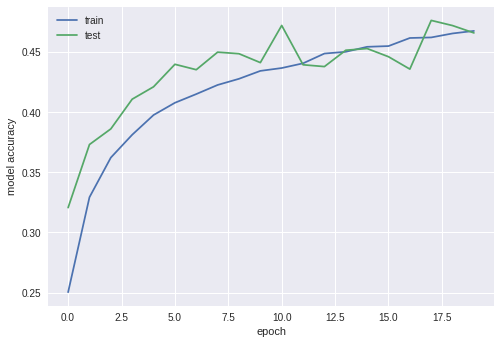

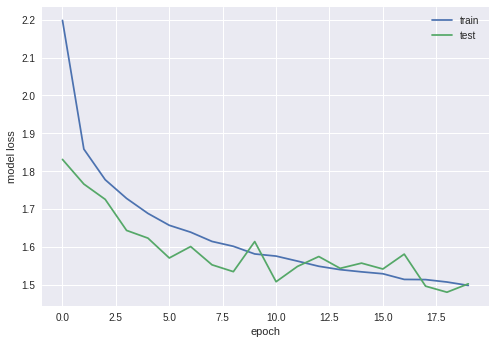

In [59]:
#  look into training history

# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()